# Article Categorization and Recommendation System

##### *This project focuses on categorizing news articles into predefined categories using natural language processing (NLP). Additionally, a content recommendation system is built to suggest similar articles.*

### Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import joblib

### Load dataset

In [14]:
df = pd.read_csv('./global_models_and_dataset/processed_dataset.csv')

#### Display dataset information

In [48]:
print("Dataset Information:")
df.info()
print("\nSample Rows:")
df[['text', 'cleaned_text']].head()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867578 entries, 0 to 867577
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   text          867578 non-null  object
 1   target        867578 non-null  object
 2   Word Count    867578 non-null  int64 
 3   cleaned_text  867578 non-null  object
dtypes: int64(1), object(3)
memory usage: 26.5+ MB

Sample Rows:


,text,cleaned_text
0,"python courses python courses, python exercis...",python courses python courses python exercise ...
1,the learning point open digital education. a r...,learning point open digital education reposito...
2,"equl offers enzyme assay kits, reagent mixtur...",equl offers enzyme assay kits reagent mixtures...
3,"tech news, latest technology, mobiles, laptops...",tech news latest technology mobiles laptops nd...
4,the best it certification materials in usa | k...,best certification materials usa killtest lead...


#### Check distribution of categories

In [3]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['target'], order=df['target'].value_counts().index)
plt.title("Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

NameError: name 'plt' is not defined

### Split dataset

In [42]:
X = df['cleaned_text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Convert text to numerical features using TF-IDF for Global df

In [43]:
# tfidf = TfidfVectorizer(max_features=5000)
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

### Train a Global Logistic Regression model

In [ ]:
# lr = LogisticRegression(max_iter=1000)
lr = LogisticRegression(max_iter=1000, solver='saga', C=1)
lr.fit(X_train_tfidf, y_train)

#### Save the model and tfidf

In [ ]:
folder_path = './global_models_and_dataset/'
os.makedirs(folder_path, exist_ok=True)

joblib.dump(lr, "./global_models_and_dataset/news_category_model.pkl")
print("model saved")
joblib.dump(tfidf, "./global_models_and_dataset/tfidf_vectorizer.pkl")
print("tfidf saved")
joblib.dump(X_train_tfidf, './global_models_and_dataset/X_train_tfidf.pkl')
print("X_train_tfidf saved")
joblib.dump(X_test_tfidf, './global_models_and_dataset/X_test_tfidf.pkl')
print("X_test_tfidf saved")

### Train and store TFIDF matrix & vectorizer for each category

In [ ]:
categories = df['target'].unique()
categories

array(['academic interests', 'arts and culture', 'automotives',
       'books and literature', 'business and finance', 'careers',
       'family and relationships', 'food and drinks', 'health',
       'healthy living', 'hobbies and interests', 'home and garden',
       'movies', 'music and audio', 'news and politics',
       'personal finance', 'pets',
       'pharmaceuticals, conditions, and symptoms', 'real estate',
       'shopping', 'sports', 'style and fashion',
       'technology and computing', 'television', 'travel', 'video gaming'],
      dtype=object)

In [ ]:
folder_path = './categorized_models_and_datasets/cat_datasets/'
os.makedirs(folder_path, exist_ok=True)
folder_path = './categorized_models_and_datasets/cat_tfidf_vect/'
os.makedirs(folder_path, exist_ok=True)
folder_path = './categorized_models_and_datasets/cat_tfidf_matrix/'
os.makedirs(folder_path, exist_ok=True)

for category in categories:
    # Filter data for the specific category
    category_df = df[df['target'] == category]
    
    # Save the category-specific DataFrame
    category_df.to_csv(f'./categorized_models_and_datasets/cat_datasets/category_{category}.csv', index=False)
    print(f"Saved data for category: {category}")

    # Create and fit a TF-IDF vectorizer for this category
    tfidf_cat = TfidfVectorizer()
    category_tfidf = tfidf_cat.fit_transform(category_df['cleaned_text'])
    
    # Save the TF-IDF vectorizer and matrix
    joblib.dump(tfidf_cat, f'./categorized_models_and_datasets/cat_tfidf_vect/category_{category}_tfidf_vectorizer.pkl')
    joblib.dump(category_tfidf, f'./categorized_models_and_datasets/cat_tfidf_matrix/category_{category}_tfidf.pkl')
    print(f"Saved TF-IDF vectorizer and matrix for category: {category}")

Saved TF-IDF vectorizer and matrix for category: academic interests
Saved TF-IDF vectorizer and matrix for category: arts and culture
Saved TF-IDF vectorizer and matrix for category: automotives
Saved TF-IDF vectorizer and matrix for category: books and literature
Saved TF-IDF vectorizer and matrix for category: business and finance
Saved TF-IDF vectorizer and matrix for category: careers
Saved TF-IDF vectorizer and matrix for category: family and relationships
Saved TF-IDF vectorizer and matrix for category: food and drinks
Saved TF-IDF vectorizer and matrix for category: health
Saved TF-IDF vectorizer and matrix for category: healthy living
Saved TF-IDF vectorizer and matrix for category: hobbies and interests
Saved TF-IDF vectorizer and matrix for category: home and garden
Saved TF-IDF vectorizer and matrix for category: movies
Saved TF-IDF vectorizer and matrix for category: music and audio
Saved TF-IDF vectorizer and matrix for category: news and politics
Saved TF-IDF vectorizer a

### Load the models instead

In [19]:
lr = joblib.load("./global_models_and_dataset/news_category_model.pkl")
print("Model loaded")

tfidf = joblib.load("./global_models_and_dataset/tfidf_vectorizer.pkl")
print("Vectorizer loaded")

X_train_tfidf = joblib.load('./global_models_and_dataset/X_train_tfidf.pkl')
print("X_train_tfidf loaded")

X_train_tfidf = joblib.load('./global_models_and_dataset/X_test_tfidf.pkl')
print("X_test_tfidf loaded")

Model loaded
Vectorizer loaded
X_train_tfidf loaded
X_test_tfidf loaded


### Evaluate the model

In [50]:
y_pred = lr.predict(X_test_tfidf)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Classification Report:
                                           precision    recall  f1-score   support

                       academic interests       0.81      0.87      0.84     14625
                         arts and culture       0.71      0.71      0.71      6590
                              automotives       0.92      0.92      0.92      7000
                     books and literature       0.86      0.91      0.89      9284
                     business and finance       0.64      0.69      0.66      7008
                                  careers       1.00      0.99      0.99      7616
                 family and relationships       0.66      0.73      0.69      7238
                          food and drinks       0.73      0.72      0.72      5857
                                   health       0.71      0.65      0.68      4742
                           healthy living       0.66      0.69      0.68      7736
                    hobbies and interests       0.83      0.72

#### Confusion Matrix

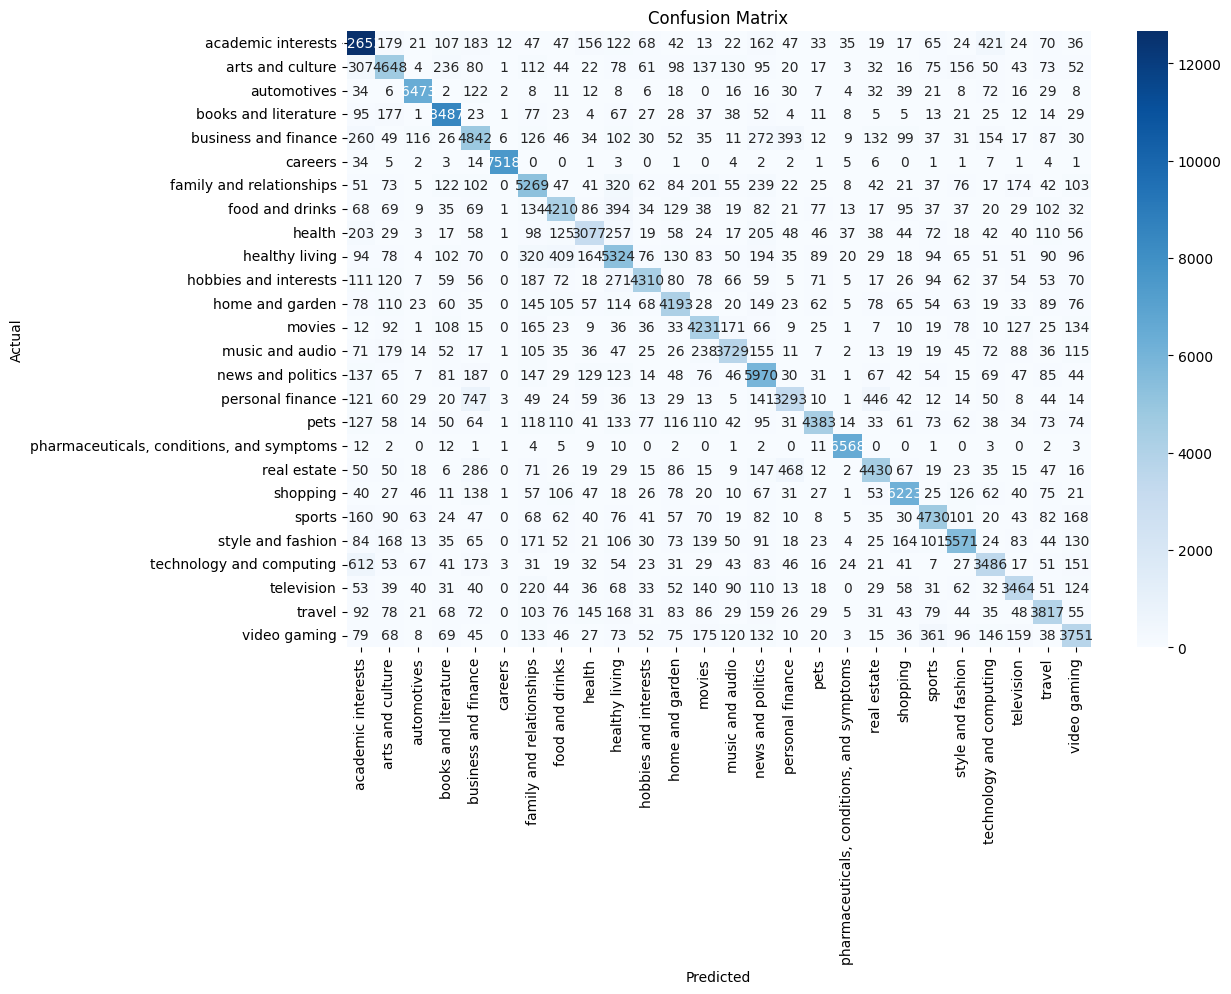

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Prediction & Recommendation System

#### Load global TFIDF matrix and vectorizer

In [ ]:
# import joblib

# lr = joblib.load("./global_models_and_dataset/news_category_model.pkl")
# print("Model loaded")

# tfidf = joblib.load("./global_models_and_dataset/tfidf_vectorizer.pkl")
# print("Vectorizer loaded")

Model loaded
Vectorizer loaded


#### Clean input text function

In [2]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rehma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Prediction & Recommendation function

In [3]:
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def recommend_articles(input_text, top_n=3):
    # Preprocess the input text
    cleaned_input_text = preprocess_text(input_text)

    # Transform the input text using the global TF-IDF vectorizer
    input_vector = tfidf.transform([cleaned_input_text])

    # Predict the category using the trained model
    predicted_category = lr.predict(input_vector)[0]

    # Load the dataset for the predicted category
    category_df = pd.read_csv(f'./categorized_models_and_datasets/cat_datasets/category_{predicted_category}.csv')

    # Load the pre-saved TF-IDF matrix for the predicted category
    category_tfidf_matrix = joblib.load(f'./categorized_models_and_datasets/cat_tfidf_matrix/category_{predicted_category}_tfidf.pkl')

    category_tfidf_vector = joblib.load(f'./categorized_models_and_datasets/cat_tfidf_vect/category_{predicted_category}_tfidf_vectorizer.pkl')

    input_vector_new = category_tfidf_vector.transform([cleaned_input_text])

    # Calculate cosine similarity between the input vector and the category's TF-IDF matrix
    similarities = cosine_similarity(input_vector_new, category_tfidf_matrix)

    # Get the indices of the top N most similar articles
    top_indices = np.argsort(similarities.flatten())[-top_n:][::-1]

    # Fetch the recommended articles based on top indices
    recommended_articles = category_df.iloc[top_indices]

    return recommended_articles, predicted_category

#### Example usage of recommendation

In [4]:
sample_text = "The stock market has seen volatility, but experts predict growth in tech stocks and sustainable investing. Investors are advised to diversify their portfolios."


In [5]:
recommendations, predicted_category = recommend_articles(sample_text)

In [6]:
predicted_category

'personal finance'

In [7]:
for i, (index, row) in enumerate(recommendations.iterrows(), 1):
    print(f"Recommendation {i}: {row['target']}")
    print(f"{row['text']}\n")

Recommendation 1: personal finance
junk bonds learn day trading learn how to invest learn to invest learning to invest learn to invest money list of stocks listed companies longterm investments losers macd madoff market data market data and information market data history market information market maker market news market reports market research market statistics market stock trading market summary markets and investments money magazine money to invest money trading stocks money 101 mutual funds invest online brokers online stock trading information online swing trading paper trading personal finance piercing candlestick pattern portfolio theory pre-market analysis price history price volatility prices of stocks profitability public companies public company public company research publicly traded stocks purchase stocks quote server quote summary real time quotes reversal rich save money save your money selecting stocks shorting stocks short selling stocks split stock stochastics stock 